In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import numpy
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
from file_resource.mmash_master.function_code import open_data, circadian, HRV_analysis

path = 'file_resource/multilevel-monitoring-of-activity-and-sleep-in-healthy-people-1.0.0/DataPaper' # Select the path where the data are allocated
users = os.listdir(path)[:-1] # Cerate a list of users' name

In [3]:
df_rr = open_data.create_dataset(users,'RR',path).reset_index() # Import dataset with RR intervals data
# Transform Time format in seconds. 0 refers to 12 AM, while positive and negative values refers to pre and post midnight, respectively.
import datetime
df_rr['timestamp'] = [float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) if y==1 else
                        float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) + 24*60*60
                        for x,y in zip(df_rr['time'],df_rr['day'])]
df_rr['datetime'] = [datetime.datetime(year=2000,month=1,day=2 if y == -29 else y,hour=int(x.split(":")[0]),minute=int(x.split(":")[1]),second=int(x.split(":")[2])).__str__()
                        for x,y in zip(df_rr['time'],df_rr['day'])]

# Fiter ectopic beats
df_rr['ibi_s'] = [x if x<2 else np.nan for x in df_rr['ibi_s']]
df_rr['ibi_s'] = [x if x>0.3 else np.nan for x in df_rr['ibi_s']]
# df_rr = df_rr.dropna()

# Compute Heart Rate values from ibi
df_rr['hr'] = [60/x for x in df_rr['ibi_s']]

In [4]:
df_rr[['ibi_s','hr']].describe().T.round(2) # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ibi_s,1665103.0,0.81,0.19,0.30,0.67,0.78,0.92,2.00
hr,1665103.0,78.86,19.73,30.02,65.43,76.43,89.29,199.34


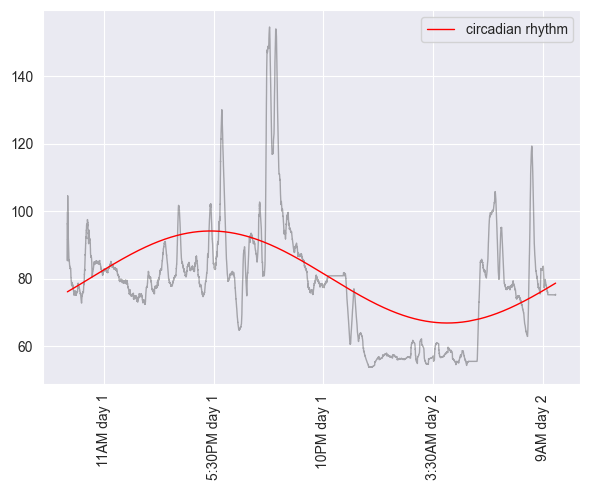

83576


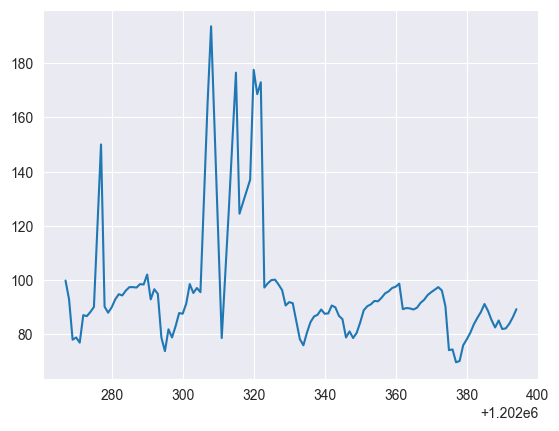

In [5]:
df_user_example = df_rr[df_rr['user']=='user_3'].dropna()
res_single = circadian.fit_sin(df_user_example['timestamp'],df_user_example['hr'].rolling(600,min_periods=1).mean(),plot=True) # fit single component cosinor curves
print(len(df_user_example['hr']))

df_user_timestamp= res_single["tt"]
res_data = res_single["yy"]
data = pd.DataFrame({"data":df_user_example['hr'].rolling(600,min_periods=1).mean(),"timestamp":df_user_example['datetime']})
plt.plot(df_user_example["hr"][0:120])

In [6]:
# from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values
#
#
#
# # This replace outliers nan values with linear interpolation
# interpolated_rr_intervals = interpolate_nan_values(rr_intervals=res_data,
#                                                    interpolation_method="linear")
#
# # This remove ectopic beats from signal
# nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# # This replace ectopic beats nan values with linear interpolation
# interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)
#
#
# data_nn = pd.Series(interpolated_nn_intervals,dtype=float)
# print(data_nn.describe().T.round(2)) # Descriptive statistics
# res_single = circadian.fit_sin(df_user_example['timestamp'],pd.Series(interpolated_nn_intervals,dtype=float).rolling(60,min_periods=1).mean(),plot=True) # fit single component cosinor curves
# print(res_single)

In [7]:

data_pd = data.groupby("timestamp").mean().reset_index()
data_ts = data_pd["timestamp"].copy()
del  data_pd["timestamp"]
index = pd.DatetimeIndex(data_ts)
data_pd.index.freq = '1s'

# data_pd.resample("1S").ffill()

# data_pd = data_pd

In [ ]:
from pandas import DataFrame
import itertools
import statsmodels.api as sm
import warnings
# warnings.filterwarnings("once")

import pmdarima as pm
# data_user1 = pd.DatetimeIndex(df_user_timestamp)


# Define the p, d and q parameters to take any value between 0 and 2

p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

out=[]
AIC=[]
num_par=[]
# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# for param in pdq:
#     pass
# param = (5,1,1)
# for param_seasonal in seasonal_pdq:
#     try:
#         mod = sm.tsa.statespace.SARIMAX(data_pd["data"],
#                                         order=param,
#                                         seasonal_order=param_seasonal,
#                                         enforce_stationarity=False,
#                                         enforce_invertibility=False)
#
#         results = mod.fit()
#         print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         out.append((param, param_seasonal))
#         AIC.append( results.aic)
#         num_par.append(np.sum(param)+np.sum(param_seasonal)-12)
#     except:
#         continue

#
# arima = pm.auto_arima(data_pd["data"], start_p=5, start_q=1, d=0, max_p=10, max_q=6,
#                      seasonal=True,m=7)


In [ ]:

#results.plot_diagnostics(figsize=(15, 12))
#plt.show()

In [ ]:
# pred = results.get_prediction(start=20000,end=65000,dynamic=False)
# pred_ci = pred.conf_int()
# ax = data_pd["data"].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.3)
# #
# # ax.fill_between(pred_ci.index,
# #                 pred_ci.iloc[:, 0],
# #                 pred_ci.iloc[:, 1], color='k', alpha=.2)
#
# ax.set_xlabel('Date')
# ax.set_ylabel('CO2 Levels')
# plt.legend()
#
# plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompfreq = int(len(data_pd)/2)
print(decompfreq,len(data))
result = seasonal_decompose(data_pd["data"], model='multiplicative',period=10000)
result.plot()

In [16]:
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(data_pd["data"][0:20000],
                                order=(0,0,1),seasonal_order=(0,1,1,32),
                                enforce_invertibility=False,enforce_stationarity=False)

results = mod.fit()
results.plot_diagnostics(figsize=(15, 12))
print(results.aic)
plt.show()

MemoryError: Unable to allocate 665. MiB for an array with shape (66, 66, 20000) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 988, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions.MemoryError: Unable to allocate 665. MiB for an array with shape (66, 66, 20000) and data type float64


AttributeError: Memoryview is not initialized

In [17]:
pred = results.get_prediction(start=20000,end=25000,dynamic=False)
pred_ci = pred.conf_int()
ax = data_pd["data"].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.3)

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

MemoryError: Unable to allocate 559. MiB for an array with shape (121, 121, 5001) and data type float64

In [ ]:
import statsmodels.api as sm
import itertools
hr2 = pd.read_csv("file_resource/hr.7257",names=["hr"])
print(hr2.head())
# create new datatime index to hr2, every 0.5s
datetime_series = pd.Series(
    pd.date_range("2000-01-01", periods=1800, freq="s")
)

hr2.set_index(datetime_series,inplace=True)
# index = pd.DatetimeIndex(datetime_series)
# hr2.index.freq = '1s'
data = hr2.rolling(30,min_periods=1).mean()

hr2_train = data.iloc[:1600]
hr2_test = data.iloc[1600:]
plt.plot(hr2_train)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, period = 128)
# result.plot()

In [ ]:


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 32) for x in list(itertools.product(p, d, q))]
# Generate all different combinations of seasonal p, q and q triplets
out=[]
AIC=[]
num_par=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(hr2_train["hr"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            out.append((param, param_seasonal))
            AIC.append( results.aic)
            num_par.append(np.sum(param)+np.sum(param_seasonal)-12)
        except:
            continue

AIC_np=np.array(AIC)
num_par_np=np.array(num_par)


plt.figure()
plt.scatter(num_par_np,AIC_np)

ind=np.where((AIC_np<1000)*(num_par_np==1))[0][0]

# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# mod =  sm.tsa.statespace.SARIMAX(hr2[0:len(hr2)-250],
#                                 order=(4,1,1),seasonal_order=(0,0,0,64),                                            enforce_stationarity=False,
#                                             enforce_invertibility=False)
#
# results = mod.fit()
# results.plot_diagnostics(figsize=(15, 12))
# print(results.aic)
# plt.show()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(hr2_train["hr"],
                                            order=(0,0,0),
                                            seasonal_order=(0, 1, 1, 120),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()
results.plot_diagnostics(figsize=(15, 12))
print(results.aic)
plt.show()

In [ ]:
pred = results.get_prediction(start=1500,end=1800,dynamic=False)
pred_ci = pred.conf_int()
# plt.plot(data)
ax = hr2_train.plot()
hr2_test.plot(label='observed',ax=ax)

pred.predicted_mean.plot(label='One-step ahead Forecast', alpha=.3)

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()